In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline
digits = load_digits()



In [34]:
print("Image data shape", digits.data.shape)
print("label data shape", digits.target.shape)

Image data shape (1797, 64)
label data shape (1797,)


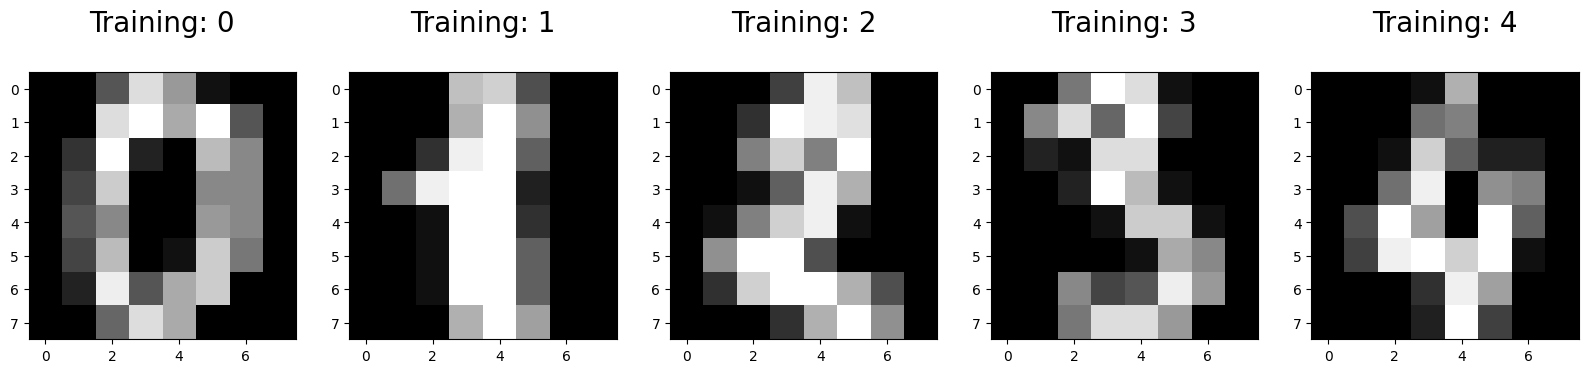

In [48]:
plt.figure(figsize=(20,4))

for index,(image,label) in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' %label, fontsize=20)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23,random_state=2)

In [37]:
print(x_train.shape)

(1383, 64)


In [38]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

In [45]:
logistic_regression.fit(x_train,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
print(logistic_regression.predict(x_test[0].reshape(1,-1)))

[4]


In [41]:
logistic_regression.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [42]:
predictions = logistic_regression.predict(x_test)

In [43]:
score = logistic_regression.score(x_test, y_test)
print(score)

0.9516908212560387


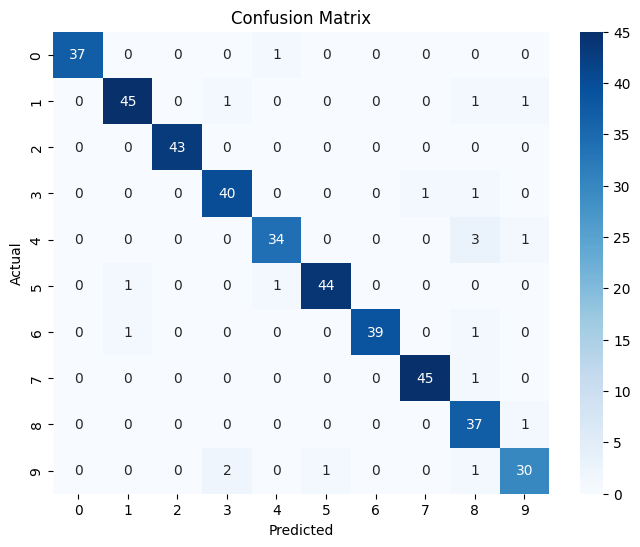

In [44]:

cm = metrics.confusion_matrix(y_test, predictions)


class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
